<a href="https://colab.research.google.com/github/gtzan/csc349A_tzanetakis/blob/main/notebooks/CSC_349A_L14_Data_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CSC 349A. Numerical Analysis
### George Tzanetakis, Fall 2025

## Lecture 14. Introduction to data fitting. Approximation Theory.

These notebooks have been written to support the teaching of Numerical Analysis at the University of Victoria, Canada.

## Introduction

Our next topic is the study of how a given function can be approximated by another function
from a sspecified class of functions. The given function may be discrete or continuous.

Typically the approximating function exhibits some desired properties such as:  

1. Continuity
2. Easily differentiated
3. Easily integrated
4. Easily evaluated


Common classes of approximating functions:   

1. Polynomials
2. Piecewise polynomials (splines)
3. Trigonometric sums (fourier series)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

np.random.seed(11)
x = np.linspace(0, 9, 10)
y = np.sin(x) + 0.5 * np.random.randn(len(x))
print(x)
print(y)

[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
[ 0.87472737  0.69843449  0.66701486 -1.18553927 -0.76094481 -1.11873996
 -0.54773018  0.81468793  1.1998836  -0.120683  ]


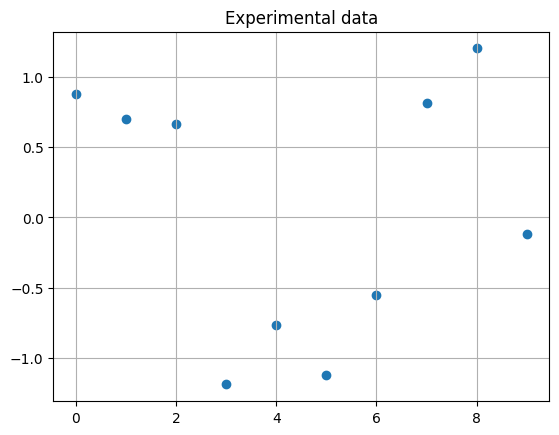

In [2]:
plt.scatter(x,y)
plt.title('Experimental data')
plt.grid()
plt.show()

### Polynomial example

In [3]:
poly_fs = []
degrees = [1, 3, 5, 7, 10]
for degree in degrees:
  poly_coeffs = np.polyfit(x, y, degree)
  print(poly_coeffs)
  poly_func = np.poly1d(poly_coeffs)
  poly_fs.append(poly_func)

[-0.0191185   0.13814434]
[-0.01349546  0.25627107 -1.30800052  1.3672184 ]
[-0.00102256  0.00954407  0.04819525 -0.52835121  0.49439149  0.84694979]
[-1.55102541e-04  4.94375250e-03 -6.31805680e-02  3.99341010e-01
 -1.21587933e+00  1.43243145e+00 -6.03488529e-01  8.58947455e-01]
[-2.23483368e-05  7.33270026e-04 -7.92309771e-03  5.81385840e-03
  5.90297442e-01 -5.60593040e+00  2.44496698e+01 -5.61100871e+01
  6.35091415e+01 -2.70079857e+01  8.74727371e-01]


/tmp/ipython-input-450137794.py:4: RankWarning: Polyfit may be poorly conditioned
  poly_coeffs = np.polyfit(x, y, degree)


In [4]:
#x = np.linspace(0,9,10)
#y = 0.5 * x + 3
#np.polyfit(x,y,1)

def simply_poly(x, a, b):
  return a * x + b

def poly(x, coefficients):
  result = 0
  for i in range(len(coefficients)):
    result += coefficients[i] * x**i
  return result

print(poly(5, [3,0.5]))


#simply_poly(5, 0.5, 3)


#poly_fn = np.poly1d([0.5,3])
#poly_fn(5)

5.5


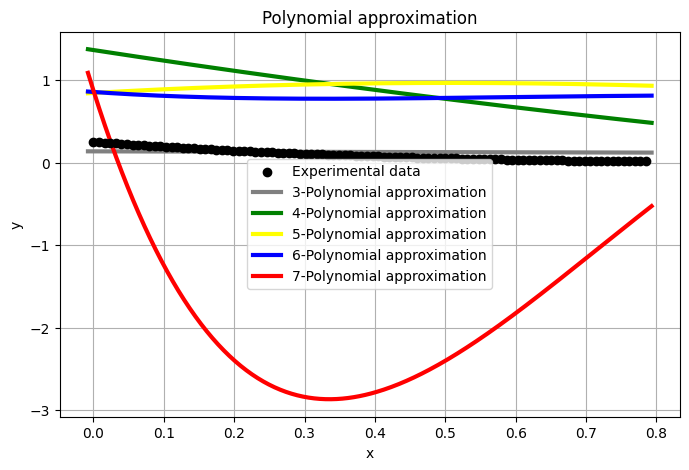

In [26]:
tails = (x.max() - x.min()) / 100
x_dense = np.linspace(x.min() - tails, x.max() + tails, 300)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="black", label="Experimental data", zorder=5)


for degree, poly_func, color in zip(degrees, poly_fs, ['gray', 'green', 'yellow', 'blue', 'red']):
  degree += 1
  y_poly = poly_func(x_dense)
  plt.plot(x_dense, y_poly, color=color, lw=3, label=f"{degree}-Polynomial approximation")
  #plt.scatter(x_dense, y_poly)
plt.legend()
plt.title("Polynomial approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### Spline example

In [6]:
spline_func_1 = make_interp_spline(x, y, k=1)
spline_func_3 = make_interp_spline(x, y, k=3)

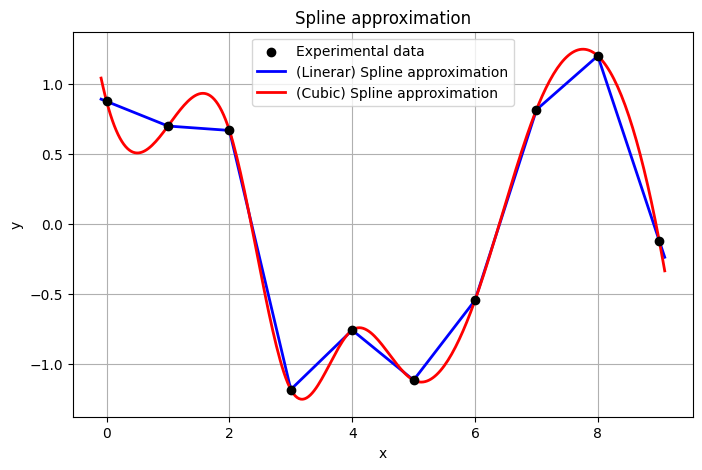

In [7]:
tails = (x.max() - x.min()) / 100
x_dense = np.linspace(x.min() - tails, x.max() + tails, 300)

y_spline_1 = spline_func_1(x_dense)
y_spline_3 = spline_func_3(x_dense)

plt.figure(figsize=(8, 5))
plt.scatter(x, y, color="black", label="Experimental data", zorder=5)
plt.plot(x_dense, y_spline_1, color="blue", lw=2, label="(Linerar) Spline approximation")
plt.plot(x_dense, y_spline_3, color="red", lw=2, label="(Cubic) Spline approximation")
plt.legend()
plt.title("Spline approximation")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.show()

### Trigonometric example

In [8]:
fs = 15
t_cont = np.linspace(0, 1, 1000)
f0 = 3
# Our analog signal
x_cont = np.sin(2 * np.pi * f0 * t_cont)

In [9]:
# Discretization
t_samp = np.arange(0, 1, 1/fs)
x_samp = np.sin(2 * np.pi * f0 * t_samp)

In [10]:
# to reconstruct analog signal by sinc
def sinc_reconstruct(t, t_samp, x_samp, fs):
    # t[:, None] - vector of time for all ssamples
    sinc_matrix = np.sinc(fs * (t[:, None] - t_samp[None, :]))
    return np.dot(sinc_matrix, x_samp)

In [11]:
x_recon = sinc_reconstruct(t_cont, t_samp, x_samp, fs)

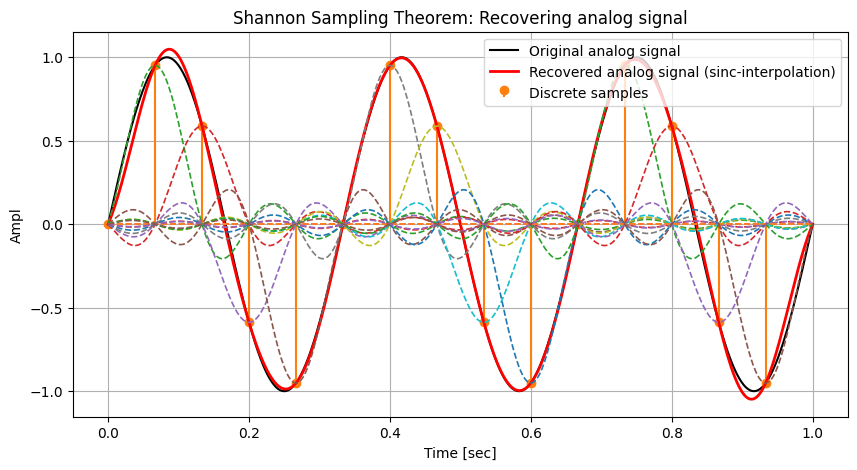

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(t_cont, x_cont, color='black', alpha=1, label='Original analog signal')
plt.stem(t_samp, x_samp, basefmt=" ", label='Discrete samples', linefmt='C1-', markerfmt='C1o')
plt.plot(t_cont, x_recon, 'r', lw=2, label='Recovered analog signal (sinc-interpolation)')


components = []

for n, xn in enumerate(x_samp):
    sinc_component = xn * np.sinc(fs * (t_cont - t_samp[n]))
    components.append(sinc_component)
    x_recon += sinc_component

for i, comp in enumerate(components):
    plt.plot(t_cont, comp, '--', lw=1.2)# label=f'Sample {i}: x[{i}]·sinc(fs·(t - {i}T))')


plt.title("Shannon Sampling Theorem: Recovering analog signal")
plt.xlabel("Time [sec]")
plt.ylabel("Ampl")
plt.legend()
plt.grid(True)
plt.show()

## Polynomial interpolation

Recall that the general formula for an $n$th-order polynomial is  

$$f(x) = a_0 + a_1x + \dotsm + a_nx^n$$  

For $n+1$ distinct data points there is one and only one order $n$ (or less) polynomial that passes through them all. That is,

1. only one line that passes through two points  
2. only one parabola that passes through three points, etc  


**Polynomial Interpolation** consists of determining the unique $n$th-order polynomial that fits the $n+1$ data points in question.

Although the polynomial is unique there are different methods for finding it and different formats for expressing it.

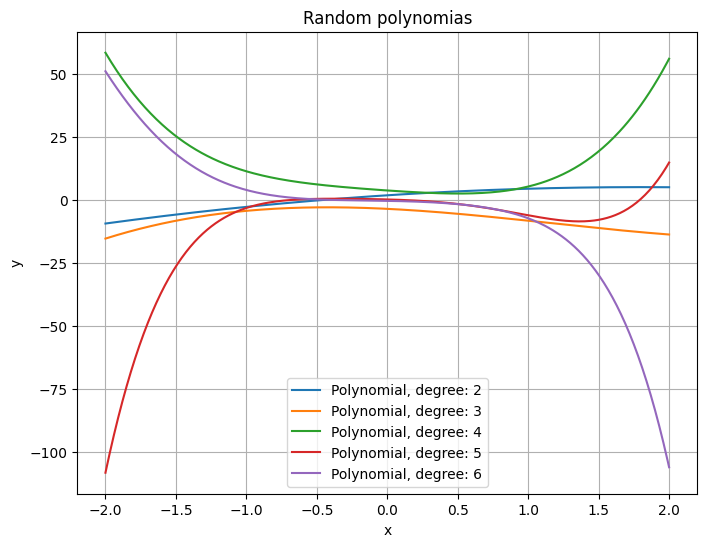

In [13]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
x = np.linspace(-2, 2, 400)
degrees = [2, 3, 4, 5, 6]
num_polynomials = len(degrees)

plt.figure(figsize=(8, 6))

for i, deg in enumerate(degrees):
    coeffs = np.random.uniform(-4, 4, deg + 1)
    y = np.polyval(coeffs, x)
    plt.plot(x, y, label=f"Polynomial, degree: {deg}")


plt.title("Random polynomias")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


In [14]:
def poly_appr_example(n, tail=0):
  x = np.linspace(0, 10, n)
  y = 10 * np.sin(x) - 2 * np.cos(0.01*x) + 3 * np.random.randn(len(x))
  poly_coeffs = np.polyfit(x, y, n-1)
  poly_func = np.poly1d(poly_coeffs)
  x_dense = np.linspace(x.min() - tail, x.max() + tail, 300)

  plt.figure(figsize=(8, 5))
  plt.scatter(x, y, color="black", label="Experemental data", zorder=5)

  y_poly = poly_func(x_dense)
  plt.plot(x_dense, y_poly, color=color, lw=2, label=f"{n-1}-Polynomial approximation")

  if tail > 0:
    plt.axvspan(x_dense.min(), x.min(), color='gray', alpha=0.2, label='Extrapolation zone (left)')
    plt.axvspan(x.max(), x_dense.max(), color='gray', alpha=0.2, label='Extrapolation zone (right)')

  plt.legend()
  plt.title("Polynomial approximation")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True)
  plt.show()

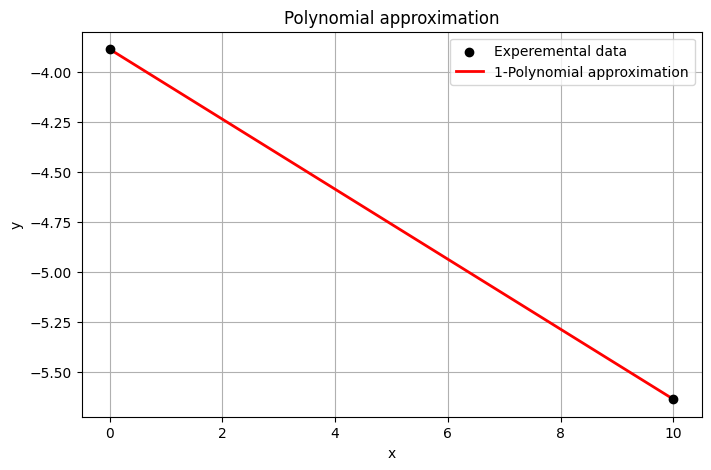

In [15]:
poly_appr_example(2)

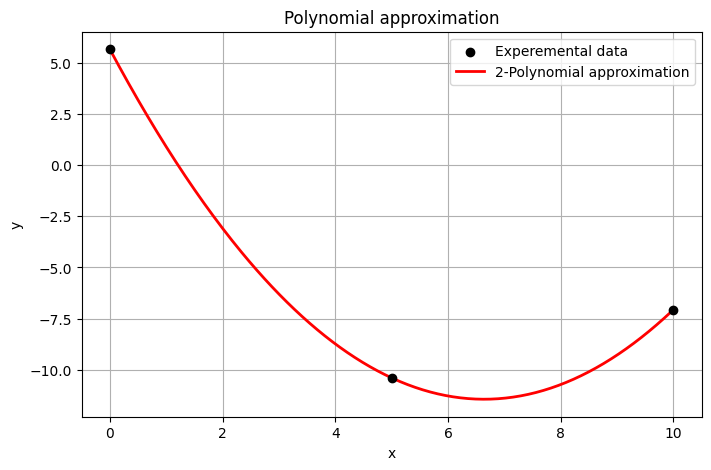

In [16]:
poly_appr_example(3)

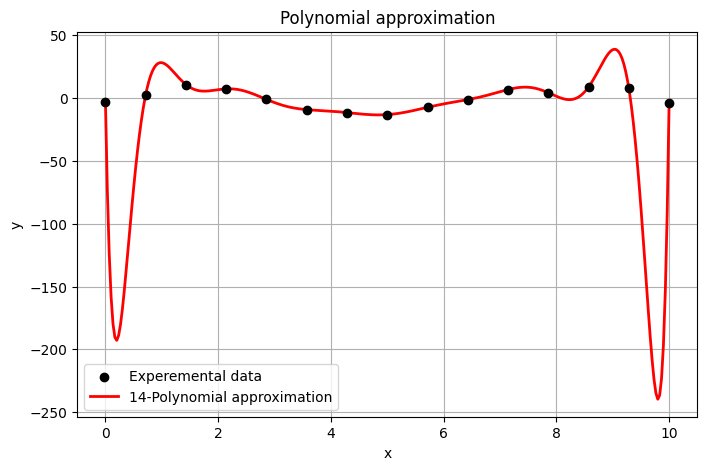

In [17]:
poly_appr_example(15)

Let $y=f(x)$ be any given function. For any value of $n \geq 0$ and any given values $x_0, x_1, \dots, x_n$, let $y_i = f(x_i)$. The **polynomial interpolation problem**  is to determine a polynomial $P(x)$ of degree less or equal to $n$ for which:
  
$P(x_i) = y_i \;\;\; \mbox{for } i=0,1,\dots,n $  


The set of $n+1$ data point $(x_i,y_i)$ maybe the only functional values known (that is, $f(x)$ is
a **discrete function**, which could occur for example with experimental data), or $f(x)$ maybe be a known **continuous function**, and the $n+1$ data points $(x_i, y_i)$ are a finite set of values with $y_i = f(x_i)$.   

If $z$ is some value between 2 of the given value $x_i$ and if $P(z)$ is computed as an approximation to $f(z)$, then this approximation to $f(z)$ is said to be determined by polynomial **interpolation**.

On the other hand, if $z$ lies outside of the interval containing all of the value $x_i$ and if $P(z)$ is computed as an approximation to $f(z)$, then this approximation to f(z) is said to be determined by polynomial **extrapolation**.



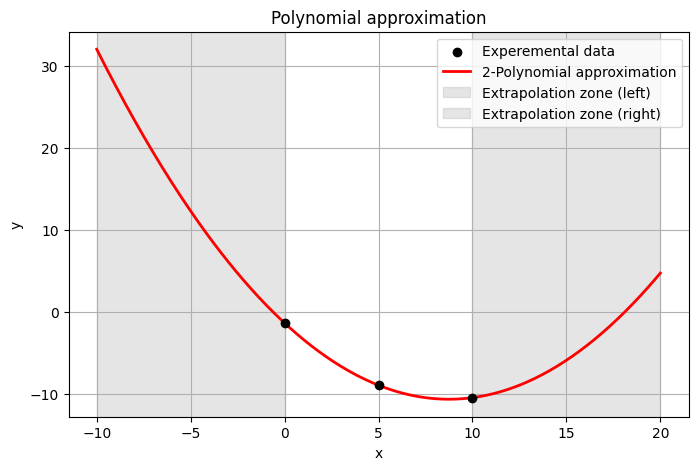

In [18]:
poly_appr_example(3, tail=10)

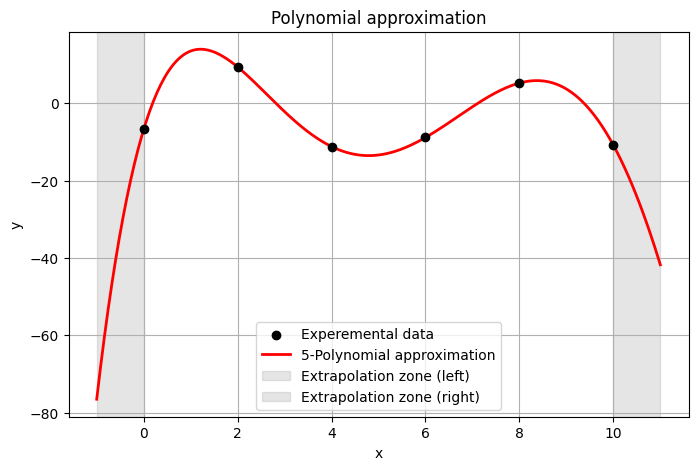

In [19]:
poly_appr_example(6, tail=1)

Note that an **interpolating polynomial** and the **Taylor polynomial** both determine polynomial approximations to $f(x)$. However, in general they are very different approximations to $f(x)$. Note that an interpolating polynomial uses the information:

$y_0 = f(x_0), y_1 = f(x_1), \dots, y_n = f(x_n)$   

to determine the polynomial approximation, whereas the Taylor polynomial uses the information:

$f(x_0), f'(x_0), \dots, f^{(n)}(x_0)$


to determine the polynomial approximation.

## Lagrange Interpolating Polynomial

Given ${(x_i,f(x_i))}, 0 \leq i \leq n$, with all $x_i$ distinct, consider the function:
\begin{align*}
P(x) &= \sum_{i=0}^{n} L_i(x) f(x_i) \\
     &= L_0(x) f(x_0) + L_1(x)f(x_1) + \dots + L_n(x)f(x_n)
\end{align*}

where
\begin{align*}
L_i(x) &= \frac{(x-x_0)(x-x_1)\dots(x-x_{i-1})(x-x_{i+1})\dots(x-x_n)}{(x_i-x_0)(x_i-x_1)\dots(x_i-x_{i-1})(x_i-x_{i+1})\dots(x_i-x_n)} \\
   &= \prod_{j=0,j \neq i}^{n} \frac{x-x_j}{x_i-x_j}, \;\;\; \mbox{for } i=0,1,2,\dots,n
\end{align*}

### Example 1

Derive the general, order $n=1$, Lagrange interpolating polynomial.

\begin{align*}
P(x) &= \sum_{i=0}^{1} L_i(x) f(x_i) \\
     &= L_0(x) f(x_0) + L_1(x)f(x_1) \\
     &= \prod_{j=0,j \neq 0}^{1} \frac{x-x_j}{x_0-x_j} f(x_0) + \prod_{j=0,j \neq 1}^{1} \frac{x-x_j}{x_1-x_j} f(x_1) \\
     &= \frac{x-x_1}{x_0-x_1} f(x_0) + \frac{x-x_0}{x_1-x_0} f(x_1)
\end{align*}

In [20]:
def lagrange_vis(x, y, poly, original=lambda x: x, x_min=0, x_max=9):
  x_dense = np.linspace(x_min, x_max, 300)
  y_dense = poly(x_dense)
  plt.figure(figsize=(8,5))
  plt.plot(x_dense, y_dense, 'r', lw=2, label=f'Lagrange polynomial (n={len(x) - 1})')
  plt.scatter(x, y, color='black', zorder=5, label='Data points')
  if original:
    plt.plot(x_dense, original(x_dense), 'b--', alpha=0.5, label='Original function')

  plt.title("Lagrange Interpolation using scipy")
  plt.xlabel("x")
  plt.ylabel("y")
  plt.grid(True)
  plt.legend()
  plt.show()

Polynomial coefficients: [-0.05046217  1.01022176]


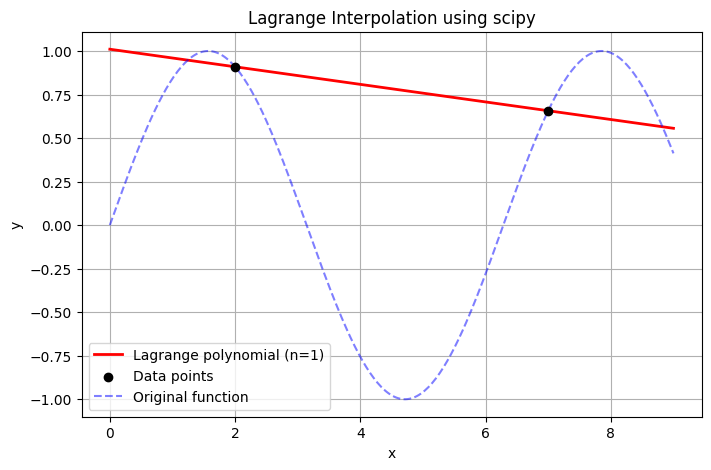

In [21]:
from scipy.interpolate import lagrange

x_points = np.array([2, 7])
y_points = np.sin(x_points)


poly = lagrange(x_points, y_points)
print("Polynomial coefficients:", poly.coefficients)


lagrange_vis(x_points, y_points, poly, np.sin)

### Example 2

Derive the general, order $n=2$, Lagrange interpolating polynomial.

\begin{align*}
P(x) &= \sum_{i=0}^{2} L_i(x) f(x_i) \\
     &= L_0(x) f(x_0) + L_1(x)f(x_1) + L_2(x)f(x_2)
\end{align*}

\noindent
where each $L_i(x)$ is at most a second degree polynomial given by,

\begin{align*}
   L_0(x) &= \prod_{j=0,j \neq 0}^{2} \frac{x-x_j}{x_0-x_j} = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)} \\
   L_1(x) &= \prod_{j=0,j \neq 1}^{2} \frac{x-x_j}{x_1-x_j} = \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)} \\
   L_2(x) &= \prod_{j=0,j \neq 2}^{2} \frac{x-x_j}{x_2-x_j} = \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)} \\
\end{align*}


Therefore,
\begin{align*}
P(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2)
\end{align*}  

Note here that $L_0(x_0) = 1$ and both $L_0(x_1) = L_0(x_2) = 0$. Similarly for $L_1$ and $L_2$.

Since each function $L_i(x)$ is a polynomial of order $n$ and $f(x_i)$ is a constant, $P(x)$ is a polynomial of order $\leq n$. Since

$ L_i(x_i) = 1 \mbox{ and } L_i(x_j) = 0 \mbox{ if } j \neq i,$
  
it follows that:   
$P(x_i) = f(x_i), \;\;\; \mbox{ for } i=0,1,2,\dots, n$  

that is, $P(x)$ is a an interpolating polynomial for the given data. It is called the **Lagrange interpolating polynomial**.


Polynomial coefficients: [ 0.13656903 -1.45102258  3.26506646]


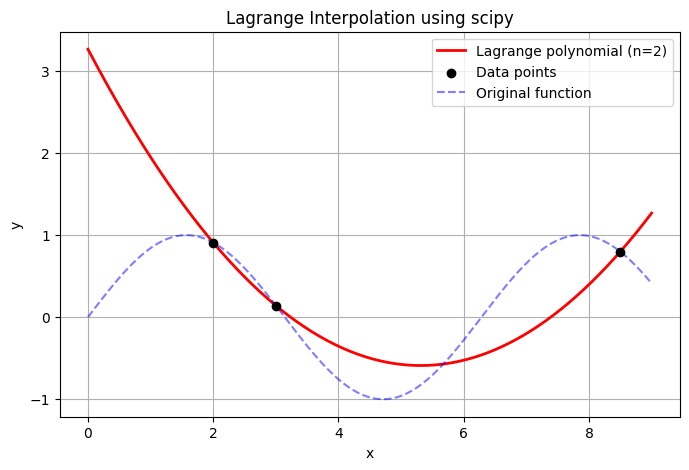

In [22]:
x_points = np.array([2, 3, 8.5])
y_points = np.sin(x_points)


poly = lagrange(x_points, y_points)
print("Polynomial coefficients:", poly.coefficients)


lagrange_vis(x_points, y_points, poly, np.sin)

### Example 3

Evaluate $\ln(2)$ using Lagrange polynomial interpolation, given that
\begin{align*}
\ln{1} &= 0 \\
\ln 4 &= 1.386294 \\
\ln 6 &= 1.791760
\end{align*}

Here, $x_0 = 1, x_1=4, x_2=6$ and $f(x_0)=0, f(x_1)=1.386294, f(x_2)=1.791760$. Substituting these into equation (1) above gives,

\begin{align*}
P(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2) \\
  = \frac{(x-4)(x-6)}{(1-4)(1-6)}0 + \frac{(x-1)(x-6)}{(4-1)(4-6)}(1.386294) + \frac{(x-1)(x-4)}{(6-1)(6-4)}(1.791760)
\end{align*}

and thus,

\begin{align*}
P(2) = \frac{(2-4)(2-6)}{(1-4)(1-6)}0 + \frac{(2-1)(2-6)}{(4-1)(4-6)}(1.386294) + \frac{(2-1)(2-4)}{(6-1)(6-4)}(1.791760)
  = \frac{-4}{3(-2)}(1.386294) - \frac{2}{5(2)}(1.791760)
  = 0.565844
\end{align*}


Polynomial coefficients: [-0.05187311  0.72146369 -0.66959057]
Evaluate ln(2) by lagrange: 0.5658443469009827
Evaluate ln(2) original: 0.6931471805599453


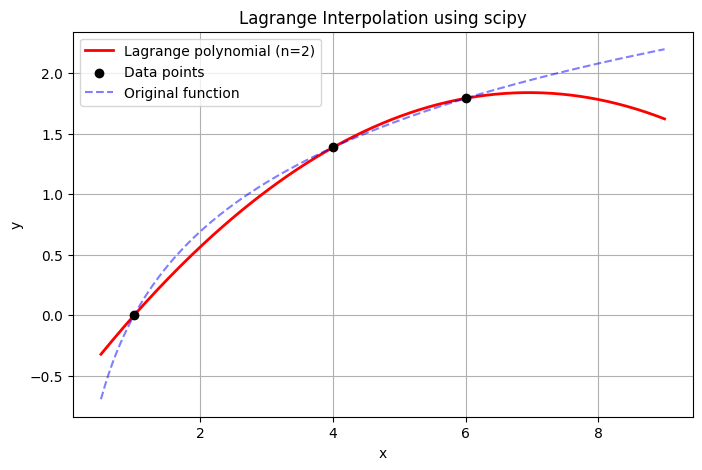

In [23]:
x_points = np.array([1., 4., 6.])
y_points = np.log(x_points)


poly = lagrange(x_points, y_points)
print("Polynomial coefficients:", poly.coefficients)
print("Evaluate ln(2) by lagrange:", poly(2.))
print("Evaluate ln(2) original:", np.log(2.))


lagrange_vis(x_points, y_points, poly, np.log, x_min=0.5)

### Example 4

A complete elliptic integral function of the first kind is defined by

$K(k) = \int_{0}^{\pi/2} \frac{dz}{\sqrt{1 - k^2\sin^2{z}}}$  

Interpolate $( K(\sin{65.5^\circ}))$ using the given data:


\begin{array}{c|c}
\sin^{-1}{k} & K(k) \\
\hline
65^\circ & 2.3088 \\
66^\circ & 2.3439 \\
67^\circ & 2.3809 \\
\end{array}


Here, we use $x_0 = 65, x_1=66, x_2=67$ and $f(x_0)=2.3088, f(x_1)=2.3439, f(x_2)=2.3809$. Substituting these into equation (1) above gives,

\begin{align*}
P(x) = \frac{(x-x_1)(x-x_2)}{(x_0-x_1)(x_0-x_2)}f(x_0) + \frac{(x-x_0)(x-x_2)}{(x_1-x_0)(x_1-x_2)}f(x_1) + \frac{(x-x_0)(x-x_1)}{(x_2-x_0)(x_2-x_1)}f(x_2) \\
  = \frac{(x-66)(x-67)}{(65-66)(65-67)}(2.3088) + \frac{(x-65)(x-67)}{(66-65)(66-67)}(2.3439) + \frac{(x-65)(x-66)}{(67-65)(67-66)}(2.3809)
\end{align*}

and thus,

\begin{align*}
P(65.5) = \frac{(65.5-66)(65.5-67)}{(65-66)(65-67)}(2.3088) + \frac{(65.5-65)(65.5-67)}{(66-65)(66-67)}(2.3439) + \frac{(65.5-65)(65.5-66)}{(67-65)(67-66)}(2.3809)
  = \frac{(-0.5)(-1.5)}{2}(2.3088) + \frac{(0.5)(-1.5)}{-1}(2.3439) + \frac{(0.5)(-0.5)}{2}(2.3809)
  = 0.8658+1.757925-0.2976125
  = 2.3261125
\end{align*}

Therefore, when $\sin^{-1}(k)=65.5^\circ$, then $K(k)=2.3261125$.

Polynomial coefficients: [ 9.5000e-04 -8.9350e-02  4.1028e+00]
Evaluate K(sin 65.5) by lagrange: 2.3261125000017664


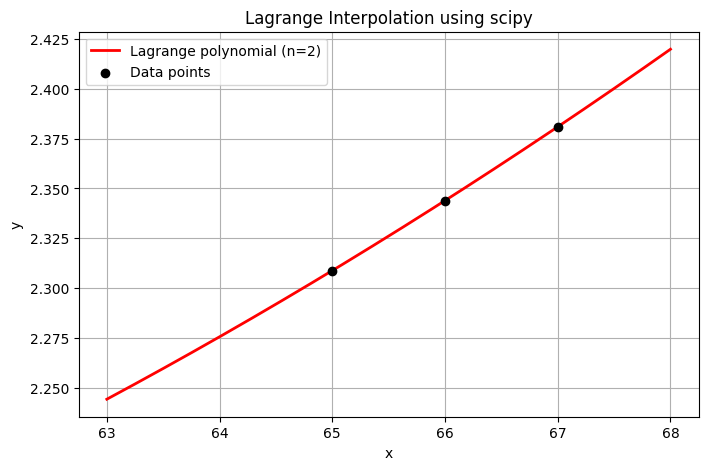

In [24]:
x_points = np.array([65., 66., 67.])
y_points = np.array([2.3088, 2.3439, 2.3809])


poly = lagrange(x_points, y_points)
print("Polynomial coefficients:", poly.coefficients)
print("Evaluate K(sin 65.5) by lagrange:", poly(65.5))


lagrange_vis(x_points, y_points, poly, None, x_min=63, x_max=68)

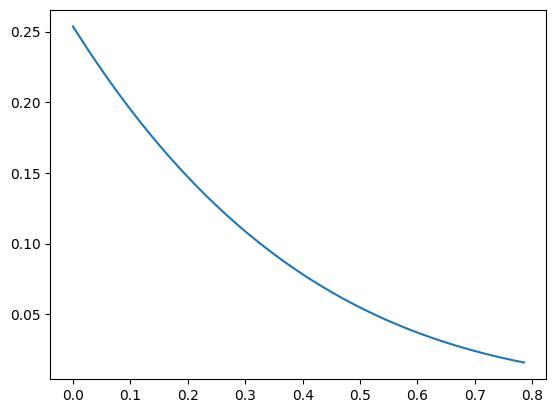

In [25]:
x = np.linspace(0, np.pi/4, 100)
y = 1.0/24.0 * (x - np.pi/2)**4

plt.plot(x,y)
plt.show()




**Example 1: Cubic Spline**

Determine $a_0,b_0,d_0,a_1,b_1,c_1,$ and $d_1$ so that
$$
S(x) = \left\{
\begin{array}{ll}
     a_0+b_0x-3x^2+d_0x^3, & -1 \leq x\leq 0 \\
     a_1+b_1x+c_1x^2+d_1x^3, & 0 \leq x\leq 1
\end{array}
\right. $$
is the natural cubic spline function such that $S(-1)=1, S(0)=2,S(1)=-1$.


**Solution**
Here, the cubic spline is expressed as
$$
S(x) = \begin{cases}
S_0(x)=a_0+b_0x-3x^2+d_0x^3, & \text{ if } 1 \leq x \leq 0 \\
S_1(x)=a_1+b_1x+c_1x^2+d_1x^3, & \text{ if } 0 \leq x \leq 1
\end{cases}
$$
and we have $x_0=-1,x_1=0,x_2=1,f(x_0)=1,f(x_1)=2,f(x_2)=-1$.

(b) \begin{equation}S_0(x_0)=f(x_0) \Rightarrow S_0(-1)=1 \Rightarrow a_0-b_0-3-d_0=1 \Rightarrow \boxed{a_0-b_0-d_0=4}\end{equation}.

\begin{equation}S_1(x_1)=f(x_1) \Rightarrow S_1(0)=2 \Rightarrow \boxed{a_1=2}\end{equation}.

\begin{equation}S_1(x_2)=f(x_2) \Rightarrow S_1(1)=-1 \Rightarrow a_1+b_1+c_1+d_1=-1 \Rightarrow \boxed{b_1+c_1+d_1=-3} \end{equation}.

(c) \begin{equation}S_1(x_1)=S_0(x_1) \Rightarrow S_1(0)=S_0(0) \Rightarrow a_1=a_0 \Rightarrow \boxed{a_0=2}\end{equation}.

(d) $S_0'(x) = b_0 -6x+3d_0x^2$ and $S_1'(x)=b_1+2c_1x+3d_1x^2$

thus

\begin{equation}S_1'(x_1)=S_0'(x_1) \Rightarrow S_1'(0)=S_0'(0) \Rightarrow b_1=b_0 \Rightarrow \boxed{b_1-b_0=0}\end{equation}.

(e)  $S_0''(x) = -6+6d_0x$ and $S_1''(x)=2c_1+6d_1x$

thus

\begin{equation}S_1''(x_1)=S_0''(x_1) \Rightarrow S_1''(0)=S_0''(0) \Rightarrow 2c_1=-6 \Rightarrow \boxed{c_1=-3}\end{equation}.

(f) To get the natural spline we use criteria (i):

\begin{equation}S_0''(x_0)=0 \Rightarrow S_0''(-1) = 0 \Rightarrow -6+6d_0(-1)=0 \Rightarrow \boxed{d_0=-1}\end{equation}.

\begin{equation}S_1''(x_2)=0 \Rightarrow S_1''(1)=0 \Rightarrow 2c_1+6d_1=0 \Rightarrow \boxed{d_1=1}\end{equation}.

So, we know that $a_0=2$, $a_1=1$, $c_1=-3$, $d_0=-1$ and $d_1=1$, that leaves the 2 unknowns $b_0$, and $b_1$ to solve. If we substitute $c_1$ and $d_1$ into equation (8) we get $b_1=-1$ and thus $b_0=-1$ by (10).

So finally the spline is,

$$
S(x) = \begin{cases}
2-x-3x^2-x^3, & \text{ if } -1 \leq x \leq 0 \\
2-x-3x^2+x^3, & \text{ if } 0 \leq x \leq 1
\end{cases}
$$




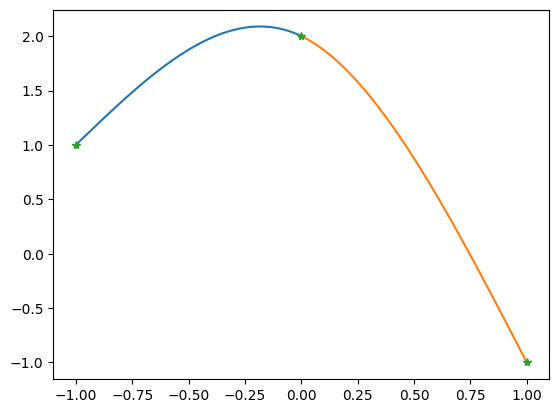

In [50]:

x=np.array([-1,0,1])
y=[1,2,-1]
x0 = np.linspace(-1, 0, 100)
x1= np.linspace(0, 1, 100)
s0=2-x0-3*x0**2-x0**3;
s1=2-x1-3*x1**2+x1**3;
plt.plot(x0,s0)
plt.plot(x1,s1)
plt.plot(x,y,"*")
plt.show()

**Example 2: Quadratic Spline**

Determine $a,b,c,d,$ and $e$ so that
$$
Q(x) = \left\{
\begin{array}{ll}
      ax^2+x+b, & -1 \leq x\leq 0 \\
     cx^2+dx+e, & 0 \leq x\leq 1
\end{array}
\right. $$
is a quadratic spline function that interpolates $f(x)$ where $f(-1)=1, f(0)=1,f(1)=1$.


**Solution**

(a) Here, the quadratic spline is expressed as
$$
Q(x) = \begin{cases}
Q_0(x)=ax^2+x+b, & \text{ if } -1 \leq x \leq 0 \\
Q_1(x)=cx^2+dx+e, & \text{ if } 0 \leq x \leq 1
\end{cases}
$$
and we have $x_0=-1,x_1=0,x_2=1,f(x_0)=1,f(x_1)=1,f(x_2)=1$. Notice that I have given you one coefficient, meaning we only have five unkowns here and thus need only five equations. This means I won't need boundary conditions in this case (no (f) criteria). Also, for quadratic splines we never have the (e) conditions.

(b) \begin{equation}Q_0(x_0)=f(x_0) \Rightarrow Q_0(-1)=f(-1) \Rightarrow a-1+b=1 \Rightarrow \boxed{a+b=2} \end{equation}.

\begin{equation}Q_1(x_1)=f(x_1) \Rightarrow Q_1(0)=f(0) \Rightarrow \boxed{e=1}\end{equation}.

\begin{equation}Q_1(x_2)=f(x_2) \Rightarrow Q_1(1)=f(1) \Rightarrow \boxed{c+d+e=1}\end{equation}.

(c) \begin{equation}Q_1(x_1)=Q_0(x_1) \Rightarrow Q_1(0)=Q_0(0) \Rightarrow e=b \Rightarrow \boxed{e-b=0}\end{equation}.

(d) $Q_0'(x) = 2ax+1$ and $Q_1'(x)=2cx+d$

thus

\begin{equation}Q_1'(x_1)=Q_0'(x_1) \Rightarrow Q_1'(0)=Q_0'(0) \Rightarrow \boxed{d=1}\end{equation}.

Here, we need to solve the above system of five equations in five unknowns. This one is simple enough that we can do it manually with equation substitutions. Thus, substituting equations (2) and (5) in (3) we get $c=-1$. Substituting (2) in (4) gives $b=1$, and substituting that into (1) gives $a=1$.


So, $a=1, b=1, c=-1,d=1,e=1$ and so finally the spline is,

$$
Q(x) = \begin{cases}
x^2+x+1, & \text{ if } -1 \leq x \leq 0 \\
-x^2+x+1, & \text{ if } 0 \leq x \leq 1
\end{cases}
$$

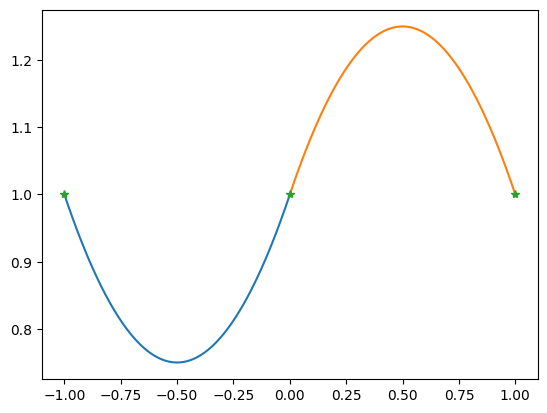

In [51]:


x=np.array([-1,0,1])
y=[1,1,1]
x0 = np.linspace(-1, 0, 100)
q0=x0 ** 2+ x0 +1;
x1= np.linspace(0, 1, 100)
q1=-x1 ** 2+x1+1;
plt.plot(x0,q0)
plt.plot(x1,q1)
plt.plot(x,y,"*")
plt.show()

12

21

In [8]:
mo(10)

TypeError: add() missing 1 required positional argument: 'z'

In [9]:
mo(10,5)

21